In [168]:
import pandas as pd
print("Wizualizacje mają przedstawiać jak duży udział w rynku mają poszczególne cryptowaluty na podstawie ich dziennej objętości")

Wizualizacje mają przedstawiać jak duży udział w rynku mają poszczególne cryptowaluty na podstawie ich dziennej objętości


In [169]:
import squarify
from pywaffle import Waffle
import matplotlib.pyplot as plt
import requests

headers = {
    'X-CMC_PRO_API_KEY': 'f14d06bc-09cf-4557-89cd-2d8f3fbb9db4',
    'Accepts': 'application/json'
}
params = {
    'start': '1',
    'limit': '10',
    'convert': 'USD'
}
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
def readData():
    json= requests.get(url, params=params, headers=headers).json()


    print(json)
    coins =json['data']
    return coins
def makeGraph(data):
    #preparing data
    dataPlot={}
    sizes=[]
    for x in data:
        name=x['slug']
        volume = x['quote']['USD']['volume_24h']
        sizes.append(volume)
        actPrice = x['quote']['USD']['price']
        print(name," volume: ",volume)
        dataPlot.update({name: volume})
    print(dataPlot)
    labels = [f"{k} ({round(v / sum(dataPlot.values()) * 100, 2)}%)" for k, v in dataPlot.items()]
    plt.figure(figsize=(32, 18), dpi=80)
    squarify.plot(sizes, label=labels,alpha=.8)

    plt.axis('off')
    plt.show()
    fig = plt.figure(
        figsize=(16,9), dpi=80,alpha=.8,
        FigureClass=Waffle,
        rows=10,
        columns=11,
        values=dataPlot,
        rounding_rule='nearest',
        plot_anchor='S', icon_size=50,

        title={
            'label': 'Udział kryptowalut na rynku po 24h obrotu',
            'loc': 'left',
            'fontdict': {
                'fontsize': 20
            }
        },
        labels=[f"{k} ({round(v / sum(dataPlot.values()) * 100,2)}%)" for k, v in dataPlot.items()],
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}

    )
    fig.set_facecolor('#DDDDDD')
    plt.show()

{'status': {'timestamp': '2022-06-09T02:56:59.216Z', 'error_code': 0, 'error_message': None, 'elapsed': 52, 'credit_count': 1, 'notice': None, 'total_count': 10034}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9526, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

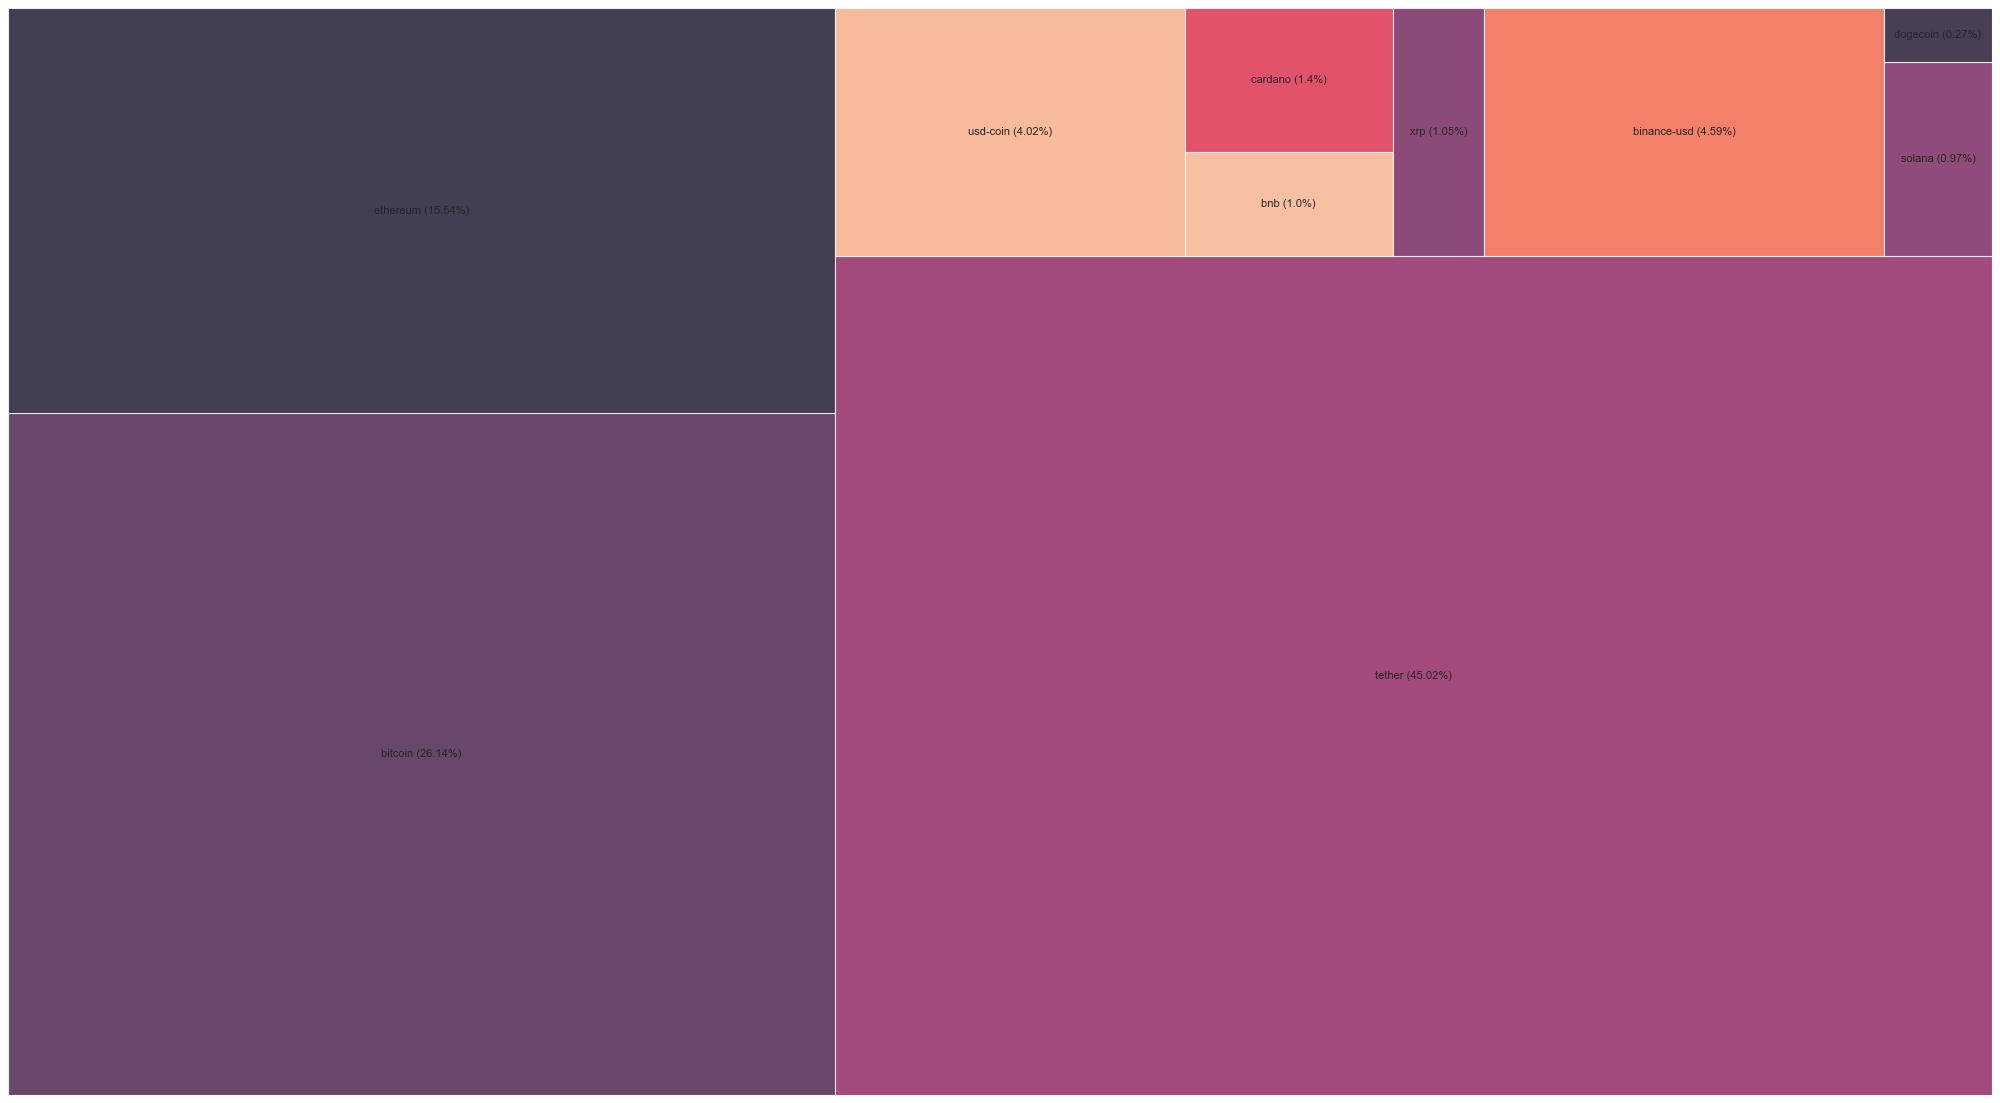

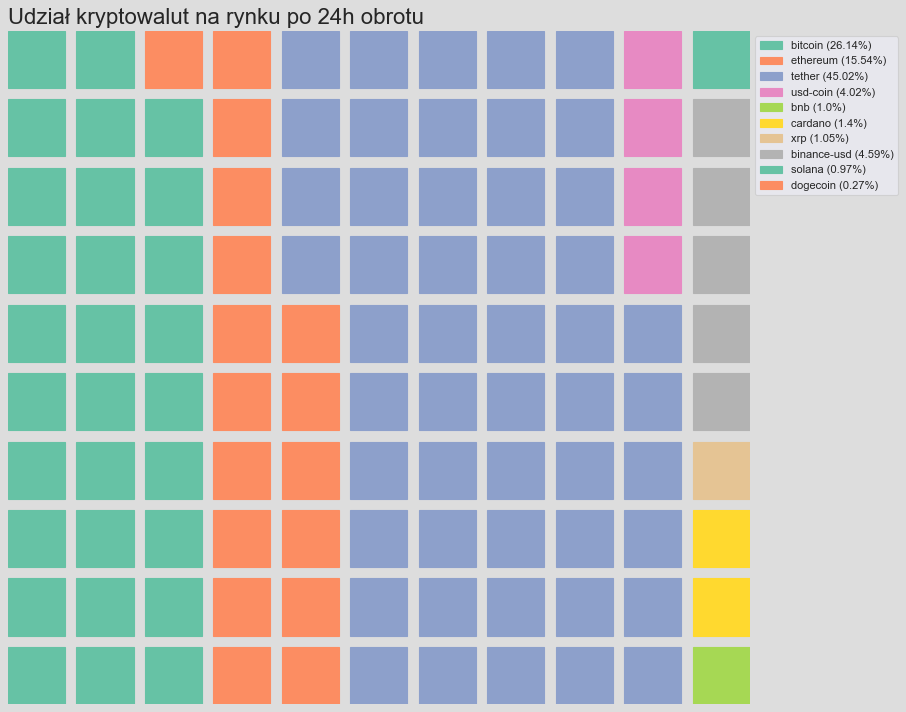

In [170]:
data=readData()
makeGraph(data)

In [171]:
import ipywidgets as widgets
import datetime
import pandas as pd
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display
from IPython.display import HTML
#wczytywanie danych z historii bitcoina
#TODO miejsce na dodanie wczytywania wykresów z poprzednich dat- użyjemy do tego baz danych z kaggli
# columnListBTC=["Currency","Date","High","Volume"]
# bitCoinPrice= pd.read_csv('consolidated_coin_data.csv',usecols=columnListBTC)
# bitCoinPrice['Date']=pd.to_datetime(bitCoinPrice['Date'])

In [172]:
#wprowadzamy date z której chcemy wykres

In [173]:
# dp = widgets.DatePicker(value = datetime.date(2016,1,1))
# dp.observe(date_eventhandler, names='value')
# bitCoinPrice[bitCoinPrice['date'] = pd.to_datetime(date_selected,format='%Y-%m-%d')]


In [174]:
print("Historyczne wykresy:")


Historyczne wykresy:


In [175]:
#we are going to start with importante imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')
#for graphs
import matplotlib.dates as mdates

#we are going to filter up to top 8 crypto to make it more viisble
numberOfCryptoShowing=8


In [176]:
import plotly.express as px
from plotly import graph_objects as go
def getDataFromFile():
    columnList=["Currency","Date","Volume","High"]
    CoinData= pd.read_csv('consolidated_coin_data.csv',usecols=columnList)
    return CoinData
def getDataFromDate(source,dateOfVis):
    print (type(dateOfVis))
    print(dateOfVis)
    #konwertujemy na odpowiedzi typ danych do porownania
    source['Date']=pd.to_datetime(source['Date'])
    #bierzemy dane z odpowiedniej daty i konwertujemy je na
    dateOfVis1=datetime.strptime(dateOfVis, "%d/%m/%Y")
    # print(bitCoinPrice.query('Date >= @dateOfVis and Date <= @dateOfVis'))
    filter=source.query('Date >= @dateOfVis and Date <= @dateOfVis')
    print(type(filter))
    return filter
def makeGraphFromDate(filtered,dzien):
    dataPlot={}
    sizes=[]
    curr=filtered["Currency"].tolist()
    date=filtered["Date"].tolist()
    vol=(filtered["Volume"].replace(',', '')).tolist()
    high=(filtered["High"].replace(',', '')).tolist()
    for index,row in filtered.iterrows():
        name=str(row["Currency"])
        volume=float(row['Volume'].replace(',', ''))
        sizes.append(volume)
        print(name," volume: ",volume)
        dataPlot.update({name: volume})
    print(dataPlot)
    fig=go.Figure(go.Funnelarea(values=sizes,text=[f"{k} ({round(v / sum(dataPlot.values()) * 100,2)}%)" for k, v in dataPlot.items()],))
    fig.show()

    fig=plt.figure(
                figsize=(16,9), dpi=80,alpha=.8,
        FigureClass=Waffle,
        rows=100,
        columns=110,
        cmap_name="Pastel1",
        values=dataPlot,
        rounding_rule='nearest',
        plot_anchor='S', icon_size=50,
        title={
            'label': 'Udział kryptowalut na rynku po 24h obrotu w dniu: %s'%(dzien),
            'loc': 'left',
            'fontdict': {
                'fontsize': 20
            }
        },
        labels=[f"{k} ({round(v / sum(dataPlot.values()) * 100,2)}%)" for k, v in dataPlot.items()],
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
    )
    plt.show()


In [177]:
print("Teraz pokażemy jak zmieniało się to w czasie:")
source=getDataFromFile()

Teraz pokażemy jak zmieniało się to w czasie:


<class 'str'>
12/11/2014
<class 'pandas.core.frame.DataFrame'>
tezos  volume:  44074.7
binance-coin  volume:  2667680.0
eos  volume:  2667680.0
bitcoin  volume:  32431300.0
tether  volume:  1620910.0
xrp  volume:  1620910.0
bitcoin-cash  volume:  1620910.0
stellar  volume:  44074.7
litecoin  volume:  2667680.0
ethereum  volume:  32431300.0
cardano  volume:  44074.7
bitcoin-sv  volume:  2667680.0
{'tezos': 44074.7, 'binance-coin': 2667680.0, 'eos': 2667680.0, 'bitcoin': 32431300.0, 'tether': 1620910.0, 'xrp': 1620910.0, 'bitcoin-cash': 1620910.0, 'stellar': 44074.7, 'litecoin': 2667680.0, 'ethereum': 32431300.0, 'cardano': 44074.7, 'bitcoin-sv': 2667680.0}


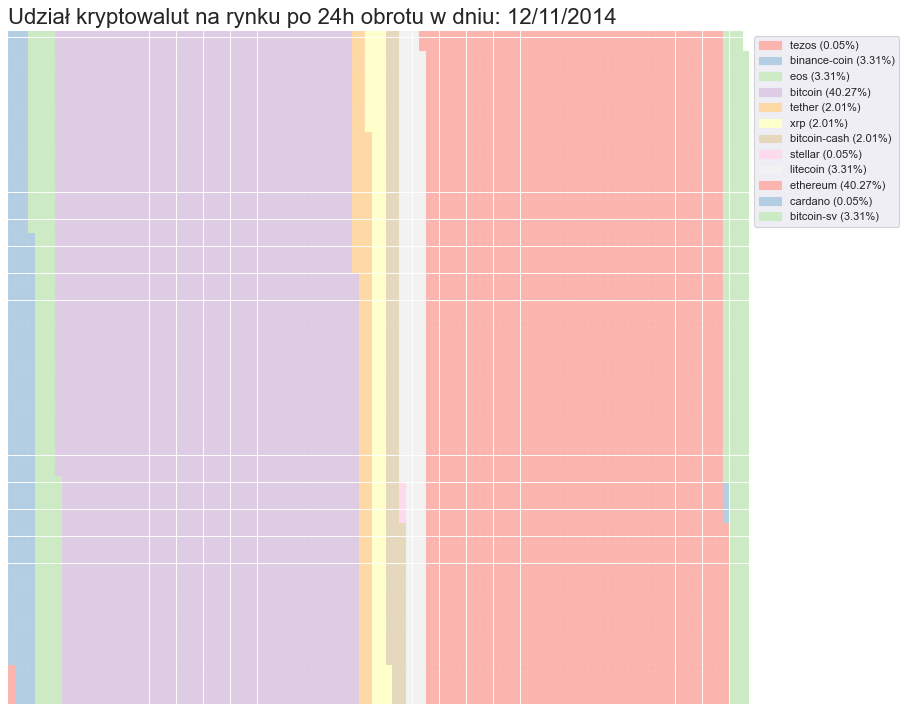

In [178]:
dzien="12/11/2014"
filtered=getDataFromDate(source,dzien)
makeGraphFromDate(filtered,dzien)

<class 'str'>
12/11/2015
<class 'pandas.core.frame.DataFrame'>
tezos  volume:  56224.5
binance-coin  volume:  5086460.0
eos  volume:  5086460.0
bitcoin  volume:  110944000.0
tether  volume:  102209.0
xrp  volume:  3465490.0
bitcoin-cash  volume:  102209.0
stellar  volume:  56224.5
litecoin  volume:  5086460.0
ethereum  volume:  801072.0
cardano  volume:  56224.5
bitcoin-sv  volume:  5086460.0
{'tezos': 56224.5, 'binance-coin': 5086460.0, 'eos': 5086460.0, 'bitcoin': 110944000.0, 'tether': 102209.0, 'xrp': 3465490.0, 'bitcoin-cash': 102209.0, 'stellar': 56224.5, 'litecoin': 5086460.0, 'ethereum': 801072.0, 'cardano': 56224.5, 'bitcoin-sv': 5086460.0}


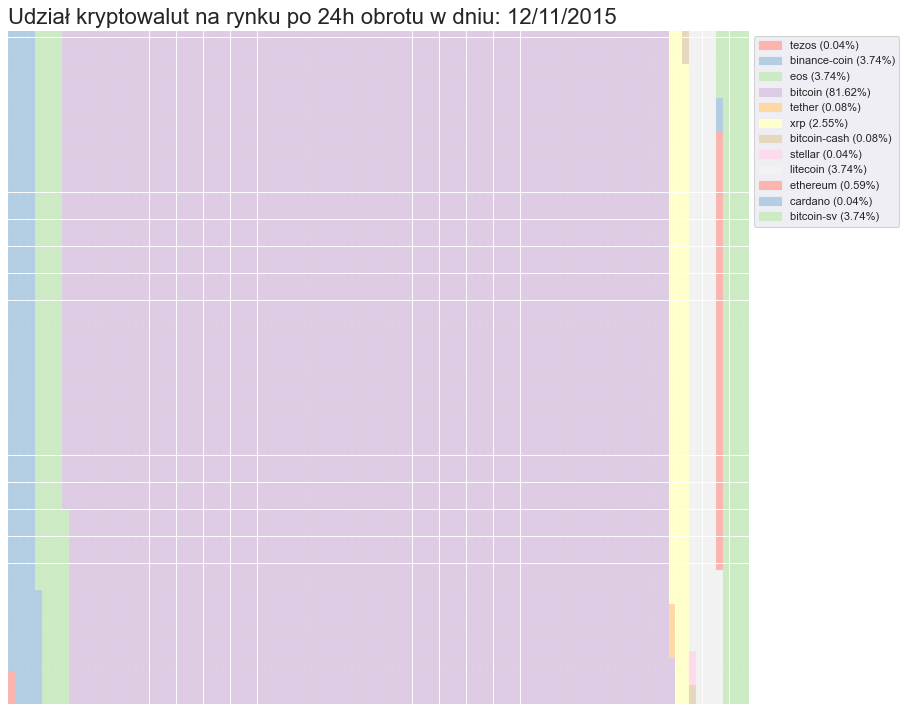

In [179]:
dzien="12/11/2015"
filtered=getDataFromDate(source,dzien)
makeGraphFromDate(filtered,dzien)

<class 'str'>
12/11/2016
<class 'pandas.core.frame.DataFrame'>
tezos  volume:  306783.0
binance-coin  volume:  1948170.0
eos  volume:  1948170.0
bitcoin  volume:  57313400.0
tether  volume:  419496.0
xrp  volume:  978511.0
bitcoin-cash  volume:  419496.0
stellar  volume:  306783.0
litecoin  volume:  1948170.0
ethereum  volume:  5545500.0
cardano  volume:  306783.0
bitcoin-sv  volume:  1948170.0
{'tezos': 306783.0, 'binance-coin': 1948170.0, 'eos': 1948170.0, 'bitcoin': 57313400.0, 'tether': 419496.0, 'xrp': 978511.0, 'bitcoin-cash': 419496.0, 'stellar': 306783.0, 'litecoin': 1948170.0, 'ethereum': 5545500.0, 'cardano': 306783.0, 'bitcoin-sv': 1948170.0}


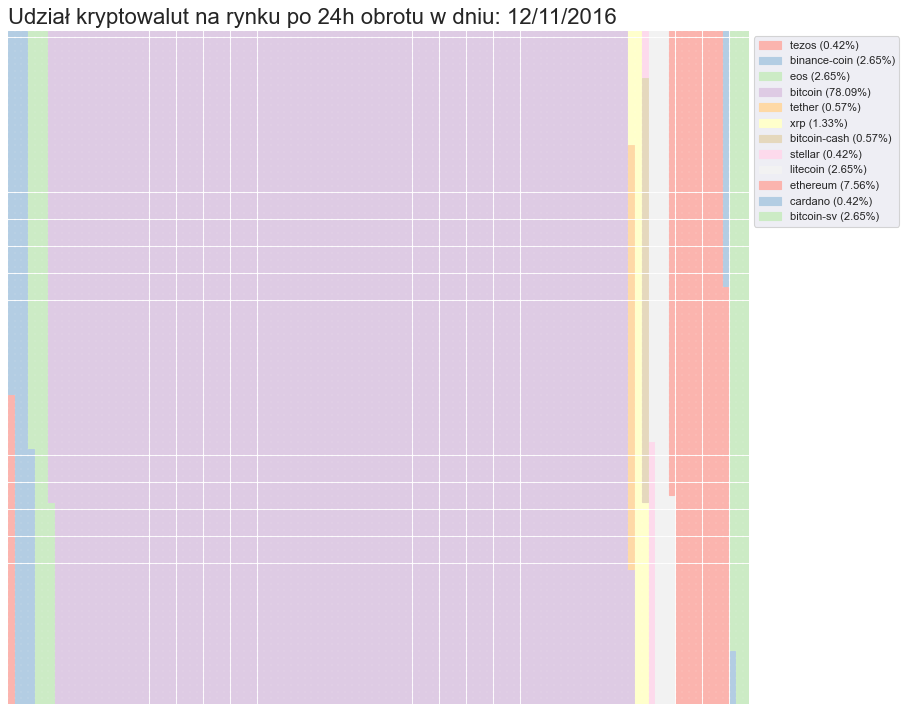

In [180]:
dzien="12/11/2016"
filtered=getDataFromDate(source,dzien)
makeGraphFromDate(filtered,dzien)

<class 'str'>
12/11/2017
<class 'pandas.core.frame.DataFrame'>
tezos  volume:  735963.0
binance-coin  volume:  19427000.0
eos  volume:  153155008.0
bitcoin  volume:  12153900032.0
tether  volume:  1542119936.0
xrp  volume:  176100992.0
bitcoin-cash  volume:  922792000.0
stellar  volume:  117548000.0
litecoin  volume:  2913979904.0
ethereum  volume:  1771440000.0
cardano  volume:  39513900.0
bitcoin-sv  volume:  19427000.0
{'tezos': 735963.0, 'binance-coin': 19427000.0, 'eos': 153155008.0, 'bitcoin': 12153900032.0, 'tether': 1542119936.0, 'xrp': 176100992.0, 'bitcoin-cash': 922792000.0, 'stellar': 117548000.0, 'litecoin': 2913979904.0, 'ethereum': 1771440000.0, 'cardano': 39513900.0, 'bitcoin-sv': 19427000.0}


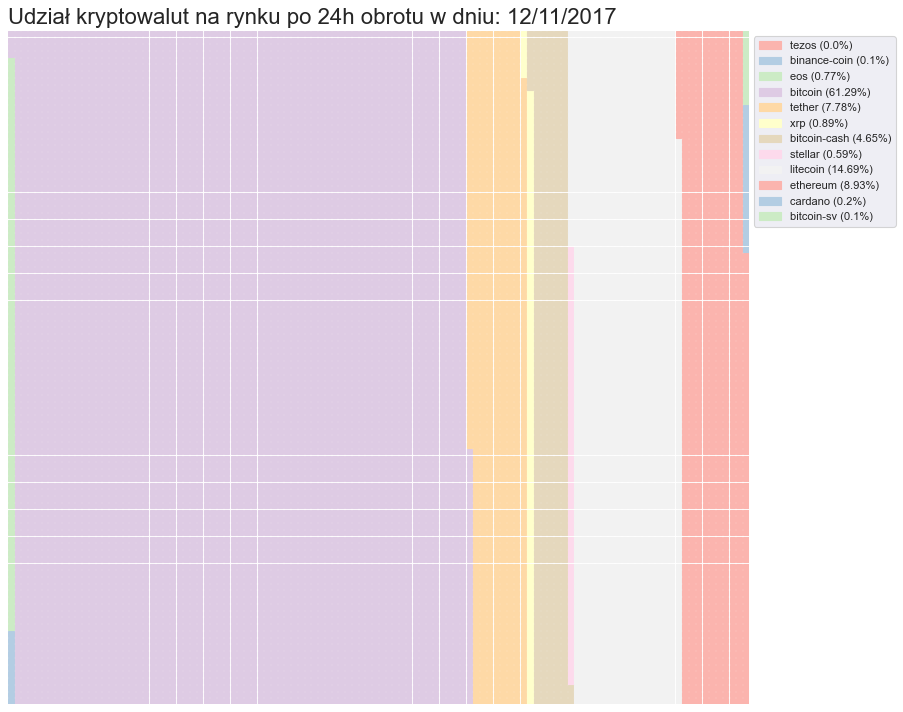

In [181]:
dzien="12/11/2017"
filtered=getDataFromDate(source,dzien)
makeGraphFromDate(filtered,dzien)

<class 'str'>
02/02/2019
<class 'pandas.core.frame.DataFrame'>
tezos  volume:  1902184.0
binance-coin  volume:  56627089.0
eos  volume:  613998325.0
bitcoin  volume:  5071623601.0
tether  volume:  3806913471.0
xrp  volume:  429425320.0
bitcoin-cash  volume:  251181380.0
stellar  volume:  142365606.0
litecoin  volume:  829064166.0
ethereum  volume:  2385157838.0
cardano  volume:  12312317.0
bitcoin-sv  volume:  67771998.0
{'tezos': 1902184.0, 'binance-coin': 56627089.0, 'eos': 613998325.0, 'bitcoin': 5071623601.0, 'tether': 3806913471.0, 'xrp': 429425320.0, 'bitcoin-cash': 251181380.0, 'stellar': 142365606.0, 'litecoin': 829064166.0, 'ethereum': 2385157838.0, 'cardano': 12312317.0, 'bitcoin-sv': 67771998.0}


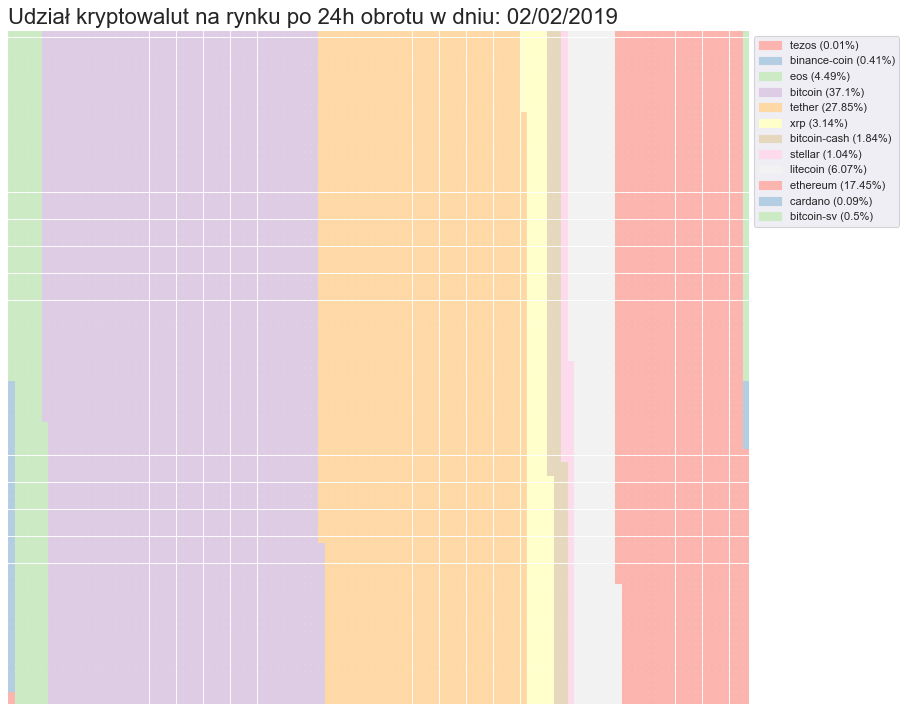

In [182]:
dzien="02/02/2019"
filtered=getDataFromDate(source,dzien)
makeGraphFromDate(filtered,dzien)